# 1. Individual Values

Over the last four missions, we focused on `distributions as a whole and learned to summarize entire distributions and measure their variability`. In this mission, we'll switch the focus to `the individual values in a distribution` and learn a few statistical techniques that can help us answer practical questions.

In [15]:
import pandas as pd
houses = pd.read_table('AmesHousing_1.txt')
houses.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [2]:
print(houses['SalePrice'].sample(1, random_state = 0))

2216    220000
Name: SalePrice, dtype: int64


We can see we got a price of `$220,000`. Is a house costing `$220,000` cheap, expensive, or average-priced? To answer this question, we can start with finding the mean price of a house and then figure out whether `$220,000` is below or above the mean:

In [3]:
print(houses['SalePrice'].mean())

180796.0600682594


The sampled house `($220,000)` is clearly more expensive than the average house `(roughly $180,796)`, but is this price slightly above the average or extremely above the average? The answer depends on the standard deviation of the distribution of sale prices.

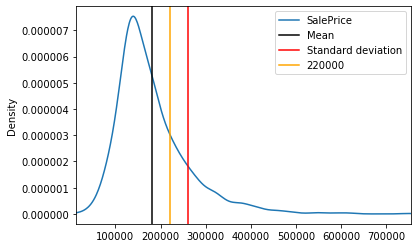

In [4]:
import matplotlib.pyplot as plt
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                    houses['SalePrice'].max()
                                    )
                            )

st_dev = houses['SalePrice'].std(ddof = 0)
mean = houses['SalePrice'].mean()
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean + st_dev, color = 'Red', label = 'Standard deviation')
plt.axvline(220000, color = 'Orange', label = '220000')
plt.legend()

very_expensive = False

# 2. Number of Standard Deviations

Previously, we determined whether $220,000 is expensive or not by considering both the mean and the standard deviation of the distribution. We found an answer using a kernel density plot, but overall the process took more steps than it was ideal, and we also relied on a visual estimate which lacks high precision.

We need to find a faster and more precise way to measure how far off a value is from the mean (taking into account at the same time the standard deviation of the distribution).

In [5]:
distance = 220000 - houses['SalePrice'].mean()
st_devs_away = distance / houses['SalePrice'].std(ddof = 0)

# 3. Z-scores

In the previous exercise, we managed to find the number of standard deviations away from the mean for a value of $220,000 by:

* Finding the distance between the value and the mean (by subtracting the mean from that value).
* Dividing the distance by the standard deviation of the distribution.

Let's try to describe this process algebraically: for any value $x$ in a population with mean $\mu$ and standard deviation $\sigma$, the number of standard deviations away from the mean is given by the formula below, where we denote the number of standard deviations away from the mean with $z$:



# $\begin{equation}
z = \frac{x - \mu}{\sigma}
\end{equation}$

The value representing the number of standard deviations away from the mean is commonly known as the standard score, or the z-score. We'll use the term "z-score" throughout our courses.

Z-scores can also be defined fairly easy for samples. For any value $x$ in a sample with mean $\bar{x}$ and standard deviation $s$ (with Bessel's correction), the z-score $Z$ is given by the formula:
# $\begin{equation}
z = \frac{x - \bar{x}}{s}
\end{equation}$

We can see that a z-score has two parts:

* The sign, which indicates whether the value is above or below the mean.
* The value, which indicates the number of standard deviations that a value is away from the mean.

In [6]:
min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()
def z_score(value, array, bessel = 0):
    mean = sum(array) / len(array)
    
    from numpy import std
    st_dev = std(array, ddof = bessel)
    
    distance = value - mean
    z = distance / st_dev
    
    return z

min_z = z_score(min_val, houses['SalePrice'])
mean_z = z_score(mean_val, houses['SalePrice'])
max_z = z_score(max_val, houses['SalePrice'])

# 4. Locating Values in Different Distributions

Let's now consider an example that's suggestive for the kind of questions we can answer using z-scores.

Let's say we're working as data analysts for a real estate company, and we want to find the best neighborhood in Ames to invest in (remember that our data set describes sale prices for houses in Ames, Iowa). Our company wants to buy a couple of houses that we can then rent and ideally sell back later at a higher price. We think that location is an important factor driving rental and sale prices, and we want to target our investment based on location.

The company budgeted $10,000,000 for this investment, and the plan is to buy 50 houses of $200,000 each. Depending on the market particularities of each neighborhood, a $200,000 house can be considered cheap, average-priced, or expensive. We want to find a neighborhood where a price of $200,000 goes as average because average-priced houses are the ones that are most rented and easiest to sell.

Sale prices are lower in a bad neighborhood, and someone can get a high-quality house for $200,000, but usually people avoid bad neighborhood nonetheless for a variety of reasons: distance from the workplace, lack of schools, pollution, noise, etc.

High-quality neighborhoods will tend to be avoided as well because of the higher sale prices — with $200,000, you may only be able to get a poor-quality house in a good location. So most people will aim for something in the middle — these people make up the market we intend to reach.

We're asked by our real estate specialists to analyze historical data on five neighborhoods:

North Ames.
College Creek.
Old Town.
Edwards.
Somerset.
Our goal is to find out for which of these neighborhoods a $200,000 house is average-priced. We can solve this task quickly by measuring the z-score for a $200,000 value for each of the five distributions — each of the five neighborhoods has its own distribution of sale prices with its own mean and standard deviation.

We saw in the previous exercise that the mean of a distribution has a z-score of 0, so our recommendation should be the neighborhood with the z-score closest to 0 (we'll detail later in this mission why the mean of a distribution has a z-score of 0).

Note that we can't simply find the mean sale price of each neighborhood and then just subtract $200,000 from the mean to find the neighborhood with the lowest difference. This way we'd fail to take into account the variability of each distribution.

In [7]:
def z_score(value, array, bessel = 0):
    mean = sum(array) / len(array)
    
    from numpy import std
    st_dev = std(array, ddof = bessel)
    
    distance = value - mean
    z = distance / st_dev
    
    return z
# Segment the data by location
north_ames = houses[houses['Neighborhood'] == 'NAmes']
clg_creek = houses[houses['Neighborhood'] == 'CollgCr']
old_town = houses[houses['Neighborhood'] == 'OldTown']
edwards = houses[houses['Neighborhood'] == 'Edwards']
somerset = houses[houses['Neighborhood'] == 'Somerst']

# Find the z-score for 200000 for every location
z_by_location = {}
for data, neighborhood in [(north_ames, 'NAmes'), (clg_creek, 'CollgCr'),
                     (old_town, 'OldTown'), (edwards, 'Edwards'),
                     (somerset, 'Somerst')]:
    
    z_by_location[neighborhood] = z_score(200000, data['SalePrice'],
                                          bessel = 0)

# Find the location with the z-score closest to 0
print(z_by_location)
best_investment = 'College Creek'

{'NAmes': 1.7239665910370232, 'CollgCr': -0.03334366282705464, 'OldTown': 1.7183080926865524, 'Edwards': 1.4435761938489418, 'Somerst': -0.5186390646965723}


# 5. Transforming Distributions

Z-scores are often used to transform entire distributions by converting all the values to z-scores.

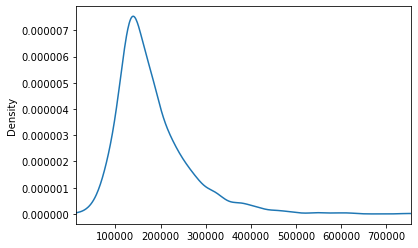

In [8]:
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                    houses['SalePrice'].max()
                                   )
                           )

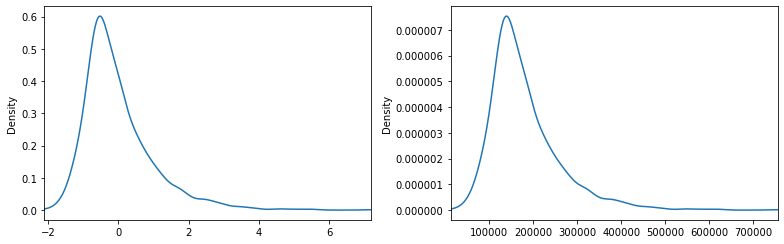

In [9]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)

houses['z_prices'] = houses['SalePrice'].apply(
    lambda x: ((x - mean) / st_dev)
    )

plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
houses['z_prices'].plot.kde(xlim = (houses['z_prices'].min(),
                                houses['z_prices'].max()
                                )
                        )
plt.subplot(1,2,2)
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                    houses['SalePrice'].max()
                                     )
                            )
plt.tight_layout() # otherwise the plots will overlay partially

In [10]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)
houses['z_prices'] = houses['SalePrice'].apply(
    lambda x: ((x - mean) / st_dev)
    )
z_mean_price = houses['z_prices'].mean()
z_stdev_price = houses['z_prices'].std(ddof = 0)

# Transforming 'Lot Area'
mean_area = houses['Lot Area'].mean()
stdev_area = houses['Lot Area'].std(ddof = 0)
houses['z_area'] = houses['Lot Area'].apply(
    lambda x: ((x - mean_area) / stdev_area)
    )

z_mean_area = houses['z_area'].mean()
z_stdev_area = houses['z_area'].std(ddof = 0)

# 6. The Standard Distribution

In the last exercise, the mean values were both extremely close to 0. For instance, we got a mean of -1.1429992333726227e-16 (notice the e-16 at the end) for the z-scores distribution of the SalePrice column. This number uses scientific notation to abbreviate what in full would be -0.0000000000000001429992333726227. Also, both the standard deviations were also very close to 1: 1.0000000000000002 and 0.9999999999999997.

In fact, for every distribution of z-scores, the mean is always 0 and the standard deviation is always 1. We got slightly different values in the previous exercise because of small rounding errors. Let's now figure out why the mean is always 0 and standard deviation is always 1.

In [11]:
from numpy import std, mean
population = [0,8,0,8]
mean_pop = mean(population)
stdev_pop = std(population, ddof = 0)

standardized_pop = []
for value in population:
    z = (value - mean_pop) / stdev_pop
    standardized_pop.append(z)
    
mean_z = mean(standardized_pop)
stdev_z = std(standardized_pop, ddof = 0)

# 7. Standardizing Samples

When we standardize a sample, the resulting distribution of z-scores is itself a sample. This means that we need to use the formula for the sample standard deviation  when we compute the standard deviation. Let's see if that makes the standard deviation $s$ equal to 1, just like we'd expect.

In [12]:
from numpy import std, mean
sample = [0,8,0,8]

x_bar = mean(sample)
s = std(sample, ddof = 1)

standardized_sample = []
for value in sample:
    z = (value - x_bar) / s
    standardized_sample.append(z)
stdev_sample = std(standardized_sample, ddof = 1)

# 8. Using Standardization for Comparisons

Standardizing distributions can prove very useful when we need to compare values coming from different systems of measurement. Let's say there are two companies in Ames which offer services in evaluating overall house quality. Inspectors from each company examine houses and rate them with an index score which describes the overall quality of the house.

The inspection itself is quite expensive, and a house owner generally asks the service from only one company. The problem is that each company has its own system of measuring overall quality, which results in index scores that are impossible to compare. We've coded under the hood some index scores and saved them in the columns index_1 and index_2:

One thing the two systems have in common is that the index is directly proportional with the house quality — a lower index means lower quality, and a higher index means higher quality. To compare these indices coming from different measurement systems, we can:

* Standardize each distribution of index values (transform each index to a z-score).
* Then compare the z-scores.

In [13]:
mean_index1 = houses['index_1'].mean()
stdev_index1 = houses['index_1'].std(ddof = 0)
houses['z_1'] = houses['index_1'].apply(lambda x: 
                                      (x - mean_index1) / stdev_index1
                                     )

mean_index2 = houses['index_2'].mean()
stdev_index2 = houses['index_2'].std(ddof = 0)
houses['z_2'] = houses['index_2'].apply(lambda x: 
                                      (x - mean_index2) / stdev_index2
                                     )

print(houses[['z_1', 'z_2']].head(2))
better = 'first'

KeyError: 'index_1'

# 9. Converting Back from Z-scores

Previously, we standardized the index_1 and index_2 distributions and managed to solve our comparison task. Z-scores may not be always straightforward to work with or communicate to non-technical audiences, but fortunately we can convert them to other values that are more intuitive.

We merged the two columns of z-scores together into a new column named z_merged.

In [14]:
mean = 50
st_dev = 10
houses['transformed'] = houses['z_merged'].apply(
                                lambda z: (z * st_dev + mean)
                                )
mean_transformed = houses['transformed'].mean()
stdev_transformed = houses['transformed'].std(ddof = 0)

KeyError: 'z_merged'

In this mission, we learned to use z-scores to describe the location of a value within a distribution. We found that z-scores are useful for comparing values coming from different distributions with different means and standard deviations.

We also learned to standardize distributions and discussed a few situations where that might be useful. It's worth mentioning that standardization is also useful for some machine learning algorithms that we'll learn about in later courses. Also, z-scores in general are key elements in understanding confidence intervals and hypothesis testing, which we'll discuss in later courses.